In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import PIL.Image as Image
import os
import pathlib


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [23]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir= '.', untar=True)

In [24]:
data_dir

'.\\datasets\\flower_photos'

In [25]:
data_dir= pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [26]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [27]:
image_count= len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [28]:
roses= list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [29]:
flower_images_dict= {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "tulips": list(data_dir.glob("tulips/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*"))
}

In [30]:
flower_labels_dict= {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "tulips": 3,
    "sunflowers": 4
}

In [31]:
len(flower_images_dict["roses"])

641

In [32]:
img= cv2.imread(str(flower_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [33]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [34]:
X, y= [], []

for flowers, images in flower_images_dict.items():
  for image in images:
    img= cv2.imread(str(image))
    resized_img= cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_labels_dict[flowers])

In [35]:
X = np.array(X)
y= np.array(y)

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [37]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [38]:
num_classes= 5
model= Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['acc'])

model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
86/86 [==============================] - 24s 243ms/step - loss: 1.3023 - acc: 0.4397
Epoch 2/25
86/86 [==============================] - 20s 238ms/step - loss: 0.9616 - acc: 0.6268
Epoch 3/25
86/86 [==============================] - 21s 241ms/step - loss: 0.7851 - acc: 0.6988
Epoch 4/25
86/86 [==============================] - 21s 239ms/step - loss: 0.6193 - acc: 0.7718
Epoch 5/25
86/86 [==============================] - 20s 238ms/step - loss: 0.4071 - acc: 0.8543
Epoch 6/25
86/86 [==============================] - 21s 243ms/step - loss: 0.2536 - acc: 0.9161
Epoch 7/25
86/86 [==============================] - 21s 250ms/step - loss: 0.1700 - acc: 0.9495
Epoch 8/25
86/86 [==============================] - 22s 253ms/step - loss: 0.1086 - acc: 0.9688
Epoch 9/25
86/86 [==============================] - 21s 249ms/step - loss: 0.0563 - acc: 0.9851
Epoch 10/25
86/86 [==============================] - 20s 230ms/step - loss: 0.0271 - acc: 0.9935
Epoch 11/25
86/86 [====================

In [39]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 66ms/step - loss: 2.4499 - acc: 0.6536


[2.449895143508911, 0.6535947918891907]

In [40]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.5)
])

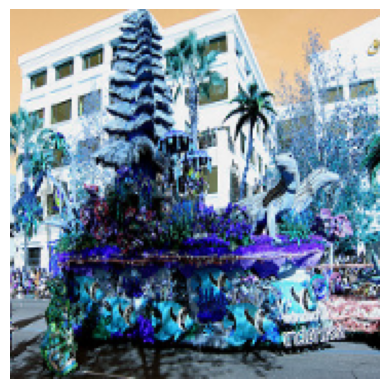

In [41]:
plt.axis('off')
plt.imshow(X[7])

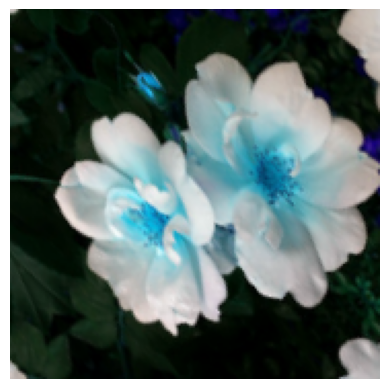

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [43]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5)
])

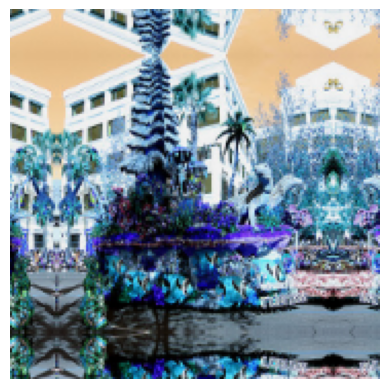

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X)[7].numpy().astype('uint8'))

In [45]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [46]:
num_classes= 5

model= Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 32s 305ms/step - loss: 1.3906 - accuracy: 0.4023
Epoch 2/30
86/86 [==============================] - 25s 289ms/step - loss: 1.0778 - accuracy: 0.5640
Epoch 3/30
86/86 [==============================] - 25s 293ms/step - loss: 0.9612 - accuracy: 0.6254
Epoch 4/30
86/86 [==============================] - 25s 291ms/step - loss: 0.8800 - accuracy: 0.6530
Epoch 5/30
86/86 [==============================] - 25s 296ms/step - loss: 0.8337 - accuracy: 0.6835
Epoch 6/30
86/86 [==============================] - 26s 307ms/step - loss: 0.7838 - accuracy: 0.7039
Epoch 7/30
86/86 [==============================] - 25s 294ms/step - loss: 0.7432 - accuracy: 0.7097
Epoch 8/30
86/86 [==============================] - 25s 292ms/step - loss: 0.7030 - accuracy: 0.7326
Epoch 9/30
86/86 [==============================] - 25s 287ms/step - loss: 0.6782 - accuracy: 0.7358
Epoch 10/30
86/86 [==============================] - 25s 287ms/step - loss: 0.6780 - accura

In [47]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 67ms/step - loss: 0.8820 - accuracy: 0.7255


[0.8819553256034851, 0.7254902124404907]

In [60]:
num_classes= 5

model= Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ["accuracy"]
)

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 70s 584ms/step - loss: 1.4235 - accuracy: 0.3634
Epoch 2/30
86/86 [==============================] - 44s 509ms/step - loss: 1.1074 - accuracy: 0.5422
Epoch 3/30
86/86 [==============================] - 43s 504ms/step - loss: 1.0187 - accuracy: 0.5938
Epoch 4/30
86/86 [==============================] - 50s 577ms/step - loss: 0.9097 - accuracy: 0.6392
Epoch 5/30
86/86 [==============================] - 47s 541ms/step - loss: 0.8544 - accuracy: 0.6602
Epoch 6/30
86/86 [==============================] - 47s 546ms/step - loss: 0.7927 - accuracy: 0.6919
Epoch 7/30
86/86 [==============================] - 48s 561ms/step - loss: 0.7775 - accuracy: 0.6999
Epoch 8/30
86/86 [==============================] - 44s 509ms/step - loss: 0.7576 - accuracy: 0.7053
Epoch 9/30
86/86 [==============================] - 43s 501ms/step - loss: 0.7438 - accuracy: 0.7133
Epoch 10/30
86/86 [==============================] - 41s 475ms/step - loss: 0.7172 - accura

In [61]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 8s 173ms/step - loss: 0.8185 - accuracy: 0.7505


[0.8185173273086548, 0.7505446672439575]

In [62]:
y_pred= model.predict(X_test_scaled)
y_pred[:5]

29/29 [==============================] - 7s 161ms/step


array([[ -3.0109036 ,  13.0713825 ,  -5.706899  ,  -3.8440979 ,
         -6.5000997 ],
       [  5.0598497 ,  -0.23546064,  -5.2299323 ,   0.4884513 ,
         -5.391884  ],
       [  0.5590332 ,   0.34277046,   7.6460385 ,  -3.2137382 ,
        -10.109637  ],
       [ -1.8830813 ,  -6.6608458 ,  -1.3923645 ,  -0.84288234,
          8.530994  ],
       [ -4.350221  ,  -6.612029  ,   5.578382  ,   0.4556806 ,
          4.24725   ]], dtype=float32)

In [63]:
result= tf.nn.softmax(y_pred[0])
result

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.03645746e-07, 9.99999881e-01, 6.99351688e-09, 4.50505908e-08,
       3.16383209e-09], dtype=float32)>